In [ ]:
import numpy as np


#Performing convolution for a Matrix

In [ ]:
def convolve2d(image, kernel, padding=0, stride=1):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel (convolution, not correlation)

    # Input dimensions
    x_img, y_img = image.shape
    x_k, y_k = kernel.shape

    # Output dimensions
    x_out = int((x_img - x_k + 2 * padding) / stride) + 1
    y_out = int((y_img - y_k + 2 * padding) / stride) + 1

    # Apply padding
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image.copy()

    # Initialize output
    output = np.zeros((x_out, y_out))

    # Perform convolution
    for i in range(0, x_out):
        for j in range(0, y_out):
            region = image_padded[i*stride:i*stride+x_k, j*stride:j*stride+y_k]
            output[i, j] = np.sum(region * kernel)

    return output


In [ ]:
image = np.array([
    [1, 2, 3, 0],
    [4, 5, 6, 1],
    [7, 8, 9, 0],
    [1, 2, 3, 4]
])

# Simple edge detection kernel
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Perform convolution
output = convolve2d(image, kernel, padding=1, stride=1)
print("Convolved Output:\n", output)


Convolved Output:
 [[  7.   4.  -6.  -9.]
 [ 15.   6. -14. -18.]
 [ 15.   6. -10. -18.]
 [ 10.   4.  -6. -12.]]


#Just Performing convolution for an Image

Saving DRONE_072182_027_png.rf.c6ee43541387c9c643bead3e41a32344.jpg to DRONE_072182_027_png.rf.c6ee43541387c9c643bead3e41a32344.jpg


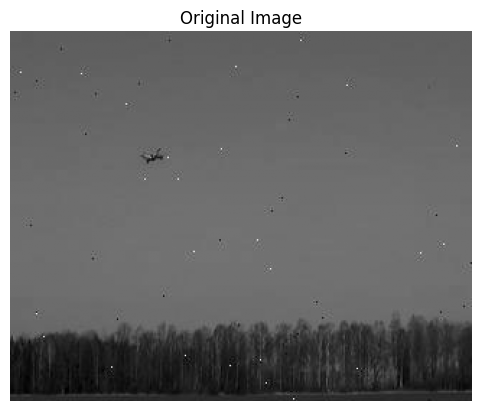

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Load the uploaded image
image_path = next(iter(uploaded))  # gets the filename
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_np = np.array(image)

# Show the original image
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


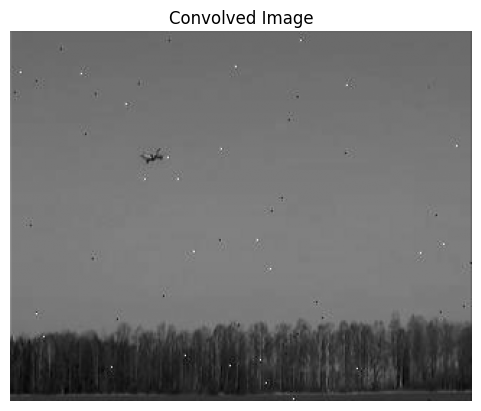

In [ ]:
# Sobel edge detection kernel (horizontal edges)
sobel_x = np.array([
    [0.2, 0.2, -0.2],
    [0.2, 3, -0.2],
    [0.2, 0.2, -0.2]
])

# Apply convolution
output = convolve2d(image_np, sobel_x, padding=1, stride=1)

# Display the result
plt.imshow(output, cmap='gray')
plt.title("Convolved Image")
plt.axis('off')
plt.show()


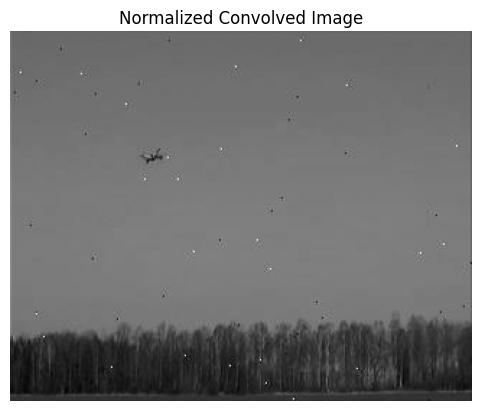

In [ ]:
output_norm = (output - np.min(output)) / (np.max(output) - np.min(output)) * 255
output_norm = output_norm.astype(np.uint8)

# Display normalized image
plt.imshow(output_norm, cmap='gray')
plt.title("Normalized Convolved Image")
plt.axis('off')
plt.show()


In [ ]:
pip install opencv-python


In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # Use webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize for faster processing
    frame = cv2.resize(frame, (320, 240))

    # Your detection pipeline goes here

    cv2.imshow("L-bend detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("ALL done")


ALL done


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
